# Project Title: Lung Cancer Prediction using Machine Learning

   ### Name: Midlaj
   ### Organization: Entri Elevate

## Overview
This project aims to build a machine learning-based classification system to predict the presence of lung cancer in patients. It involves extensive data preprocessing, feature selection, and the evaluation of multiple machine learning algorithms to identify the most accurate model. The study emphasizes early detection of lung cancer using clinical and genetic data, which can potentially improve patient outcomes.

## Objective
   The primary objectives of this project are:

    To explore and analyze patient data related to lung cancer.

    To preprocess the dataset by handling missing values, outliers, and class imbalances.

    To apply and compare multiple classification algorithms for predicting lung cancer.

    To evaluate models using metrics like accuracy, precision, recall, F1-score.

    To identify the best-performing model for reliable lung cancer prediction.

## Data Description
  The dataset used in this project is titled lung cancer.csv and includes patient-level data with the following features:

### Categorical Features:

       Gender

       Smoking History

       Family History

       Treatment History

       Mutation Type

       Biopsy Result

       Gene

### Numerical Features:

    Various numeric health indicators (unspecified in the preview)

### Target Variable:

     Lung Cancer: Binary classification label indicating the presence (1) or absence (0) of lung cancer.    


## Description:

This project focuses on predicting lung cancer based on patient data using various machine learning classification algorithms. The dataset includes multiple features such as treatment history, mutation type, and genetic factors. The steps taken in this project include:

### Data Cleaning and Preprocessing:

### Removing duplicates.

### Handling missing values using SimpleImputer.

### Dealing with class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).

#### Outlier detection through visualization (boxplots).

### Exploratory Data Analysis (EDA):

     Summary statistics, distribution checks, and data type analysis.

     Visualization of data patterns and potential outliers.

### Feature Selection and Scaling:

    Using SelectKBest and StandardScaler to prepare features for modeling.

### Modeling:

    Implementation of multiple classification algorithms including:

      Logistic Regression

      Support Vector Machine (SVC)

      Decision Tree

      Random Forest

      K-Nearest Neighbors (KNN)

      Naive Bayes

     Gradient Boosting

     AdaBoost

     Multi-Layer Perceptron (MLP)

### Evaluation:

    Performance metrics used include accuracy, precision, recall, F1-score, confusion matrix,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix,recall_score,roc_curve, roc_auc_score

## Importing data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix,recall_score,roc_curve, roc_auc_score

In [88]:
df = pd.read_csv('lung cancer.csv')

In [89]:
#basic detiles of the data

In [90]:
df.head()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
0,1,53,Male,Yes,No,NaN,0.02,Deletion,NaN,2.5,Positive,0.17,0.22,Yes
1,2,66,Female,No,No,Radiotherapy,1.61,Insertion,KRAS,1.1,Positive,0.18,0.39,Yes
2,3,40,Female,No,No,NaN,1.36,Deletion,EGFR,4.7,Negative,0.26,0.31,Yes
3,4,43,Male,Yes,No,Chemotherapy,1.93,Insertion,NaN,1.7,Positive,0.26,0.29,Yes
4,5,44,Female,No,Yes,NaN,0.63,Deletion,EGFR,5.4,Negative,0.22,0.36,Yes


In [91]:
df.tail()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
8791,8792,55,Female,Yes,No,Surgery,0.74,NaN,EGFR,5.9,Negative,0.25,0.13,Yes
8792,8793,67,Male,No,No,Surgery,1.41,Deletion,TP53,4.6,Negative,0.26,0.26,Yes
8793,8794,40,Female,Yes,No,Surgery,1.61,Insertion,KRAS,3.1,Positive,0.25,0.21,Yes
8794,8795,52,Female,No,Yes,Chemotherapy,0.07,NaN,TP53,1.5,Positive,0.39,0.39,Yes
8795,8796,40,Male,No,No,Chemotherapy,0.83,Point Mutation,NaN,5.9,Positive,0.13,0.36,Yes


In [92]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Smoking History', 'Family History',
       'Treatment History', 'ctDNA Concentration (ng/mL)', 'Mutation Type',
       'Gene', 'Tumor Size (cm)', 'Biopsy Result', 'VOC1 Concentration (ppm)',
       'VOC2 Concentration (ppm)', 'Lung Cancer'],
      dtype='object')

In [93]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8796 entries, 0 to 8795
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient ID                   8796 non-null   int64  
 1   Age                          8796 non-null   int64  
 2   Gender                       8796 non-null   object 
 3   Smoking History              8796 non-null   object 
 4   Family History               8796 non-null   object 
 5   Treatment History            6567 non-null   object 
 6   ctDNA Concentration (ng/mL)  8796 non-null   float64
 7   Mutation Type                6614 non-null   object 
 8   Gene                         7043 non-null   object 
 9   Tumor Size (cm)              8796 non-null   float64
 10  Biopsy Result                8796 non-null   object 
 11  VOC1 Concentration (ppm)     8796 non-null   float64
 12  VOC2 Concentration (ppm)     8796 non-null   float64
 13  Lung Cancer       

In [94]:
df.describe()

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm)
count,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000,8796.000000
mean,4398.500000,54.652001,0.993208,3.516405,0.273246,0.276061
std,2539.330817,14.430464,0.579690,1.447529,0.130722,0.130269
min,1.000000,30.000000,0.000000,1.000000,0.050000,0.050000
25%,2199.750000,42.000000,0.490000,2.300000,0.160000,0.160000
50%,4398.500000,55.000000,0.980000,3.500000,0.280000,0.280000
75%,6597.250000,67.000000,1.500000,4.800000,0.390000,0.390000
max,8796.000000,79.000000,2.000000,6.000000,0.500000,0.500000


In [95]:
df.shape

(8796, 14)

In [96]:
df.dtypes.value_counts()

object     8
float64    4
int64      2
Name: count, dtype: int64

In [97]:
df.nunique()

Patient ID                     8796
Age                              50
Gender                            2
Smoking History                   2
Family History                    2
Treatment History                 3
ctDNA Concentration (ng/mL)     201
Mutation Type                     3
Gene                              4
Tumor Size (cm)                  51
Biopsy Result                     2
VOC1 Concentration (ppm)         46
VOC2 Concentration (ppm)         46
Lung Cancer                       2
dtype: int64

In [98]:
#

In [99]:
# Check for Duplicates / drop

df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [100]:
# Check for missing values

print(df.isnull().sum())

Patient ID                        0
Age                               0
Gender                            0
Smoking History                   0
Family History                    0
Treatment History              2229
ctDNA Concentration (ng/mL)       0
Mutation Type                  2182
Gene                           1753
Tumor Size (cm)                   0
Biopsy Result                     0
VOC1 Concentration (ppm)          0
VOC2 Concentration (ppm)          0
Lung Cancer                       0
dtype: int64


In [101]:
#HANDLING MISSING VALUES

In [102]:
imputer = SimpleImputer(strategy='most_frequent')

In [103]:
# Impute missing values for categorical columns
df[['Treatment History', 'Mutation Type', 'Gene']] = imputer.fit_transform(
df[['Treatment History', 'Mutation Type', 'Gene']])


In [104]:
print(df.isnull().sum())

Patient ID                     0
Age                            0
Gender                         0
Smoking History                0
Family History                 0
Treatment History              0
ctDNA Concentration (ng/mL)    0
Mutation Type                  0
Gene                           0
Tumor Size (cm)                0
Biopsy Result                  0
VOC1 Concentration (ppm)       0
VOC2 Concentration (ppm)       0
Lung Cancer                    0
dtype: int64


In [105]:
df

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
0,1,53,Male,Yes,No,Radiotherapy,0.02,Deletion,KRAS,2.5,Positive,0.17,0.22,Yes
1,2,66,Female,No,No,Radiotherapy,1.61,Insertion,KRAS,1.1,Positive,0.18,0.39,Yes
2,3,40,Female,No,No,Radiotherapy,1.36,Deletion,EGFR,4.7,Negative,0.26,0.31,Yes
3,4,43,Male,Yes,No,Chemotherapy,1.93,Insertion,KRAS,1.7,Positive,0.26,0.29,Yes
4,5,44,Female,No,Yes,Radiotherapy,0.63,Deletion,EGFR,5.4,Negative,0.22,0.36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,8792,55,Female,Yes,No,Surgery,0.74,Deletion,EGFR,5.9,Negative,0.25,0.13,Yes
8792,8793,67,Male,No,No,Surgery,1.41,Deletion,TP53,4.6,Negative,0.26,0.26,Yes
8793,8794,40,Female,Yes,No,Surgery,1.61,Insertion,KRAS,3.1,Positive,0.25,0.21,Yes
8794,8795,52,Female,No,Yes,Chemotherapy,0.07,Deletion,TP53,1.5,Positive,0.39,0.39,Yes


In [106]:
df.head()

,Patient ID,Age,Gender,Smoking History,Family History,Treatment History,ctDNA Concentration (ng/mL),Mutation Type,Gene,Tumor Size (cm),Biopsy Result,VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer
0,1,53,Male,Yes,No,Radiotherapy,0.02,Deletion,KRAS,2.5,Positive,0.17,0.22,Yes
1,2,66,Female,No,No,Radiotherapy,1.61,Insertion,KRAS,1.1,Positive,0.18,0.39,Yes
2,3,40,Female,No,No,Radiotherapy,1.36,Deletion,EGFR,4.7,Negative,0.26,0.31,Yes
3,4,43,Male,Yes,No,Chemotherapy,1.93,Insertion,KRAS,1.7,Positive,0.26,0.29,Yes
4,5,44,Female,No,Yes,Radiotherapy,0.63,Deletion,EGFR,5.4,Negative,0.22,0.36,Yes


In [107]:
print(df.head())

   Patient ID  Age  Gender Smoking History Family History Treatment History  \
0           1   53    Male             Yes             No      Radiotherapy   
1           2   66  Female              No             No      Radiotherapy   
2           3   40  Female              No             No      Radiotherapy   
3           4   43    Male             Yes             No      Chemotherapy   
4           5   44  Female              No            Yes      Radiotherapy   

   ctDNA Concentration (ng/mL) Mutation Type  Gene  Tumor Size (cm)  \
0                         0.02      Deletion  KRAS              2.5   
1                         1.61     Insertion  KRAS              1.1   
2                         1.36      Deletion  EGFR              4.7   
3                         1.93     Insertion  KRAS              1.7   
4                         0.63      Deletion  EGFR              5.4   

  Biopsy Result  VOC1 Concentration (ppm)  VOC2 Concentration (ppm)  \
0      Positive            

In [108]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Get the list of numeric columns excluding 'Revenue'
numeric_cols = [i for i in df.describe(include=['float64', 'int64', 'bool']).columns if i != 'Lung Cancer']

# Apply SMOTE
x_smote, y_smote = smote.fit_resample(df[numeric_cols], df['Lung Cancer'])


## Finding outliers& remove

In [109]:
num_columns=df.select_dtypes(include=('float64','int64'))

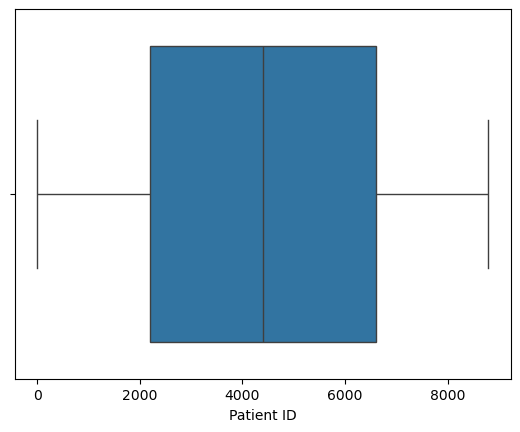

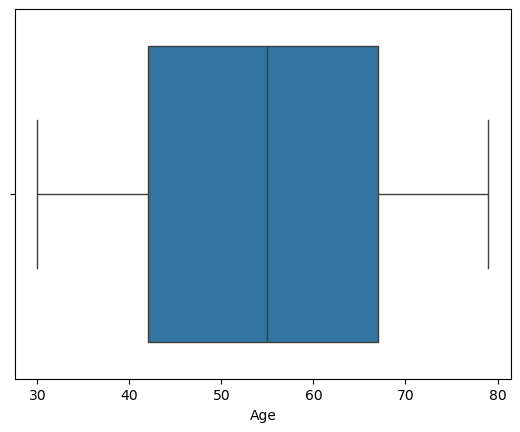

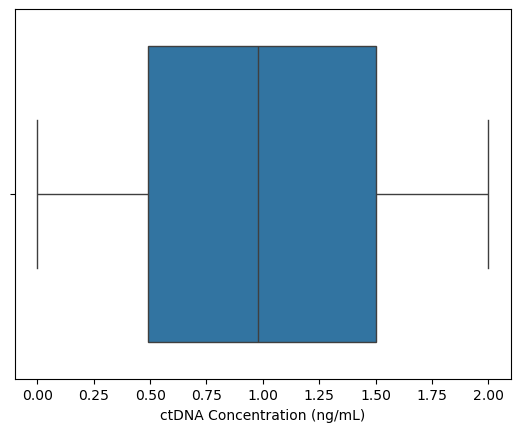

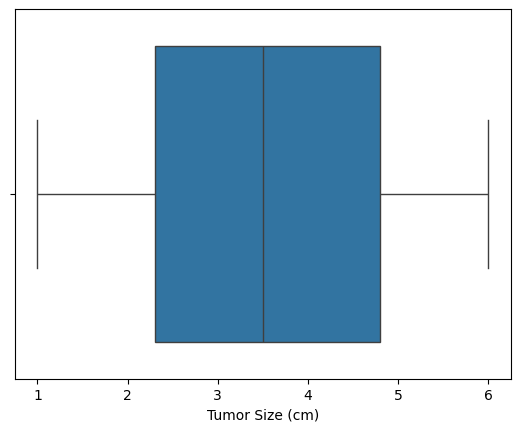

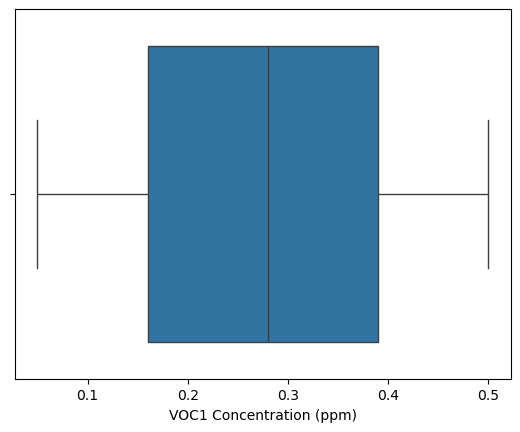

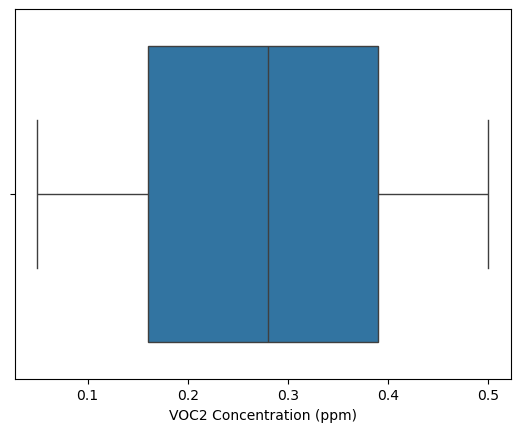

In [110]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [111]:
#iqr

def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping the outliers
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df
    

In [112]:
df1= outliers(df)

In [113]:
print(df1)

      Patient ID  Age  Gender Smoking History Family History  \
0              1   53    Male             Yes             No   
1              2   66  Female              No             No   
2              3   40  Female              No             No   
3              4   43    Male             Yes             No   
4              5   44  Female              No            Yes   
...          ...  ...     ...             ...            ...   
8791        8792   55  Female             Yes             No   
8792        8793   67    Male              No             No   
8793        8794   40  Female             Yes             No   
8794        8795   52  Female              No            Yes   
8795        8796   40    Male              No             No   

     Treatment History  ctDNA Concentration (ng/mL)   Mutation Type  Gene  \
0         Radiotherapy                         0.02        Deletion  KRAS   
1         Radiotherapy                         1.61       Insertion  KRAS   


In [114]:
#shape after outliers remove

print(df1.shape)


(8796, 14)


In [115]:
# Checking skewness of numerical columns

num_columns = df1.select_dtypes(include=['int64', 'float64']).columns
skewness = df1[num_columns].skew()
print("Skewness before transformation:\n", skewness)




Skewness before transformation:
 Patient ID                     0.000000
Age                           -0.017428
ctDNA Concentration (ng/mL)    0.020630
Tumor Size (cm)                0.004011
VOC1 Concentration (ppm)       0.003563
VOC2 Concentration (ppm)      -0.004166
dtype: float64


## VISUALIZATION

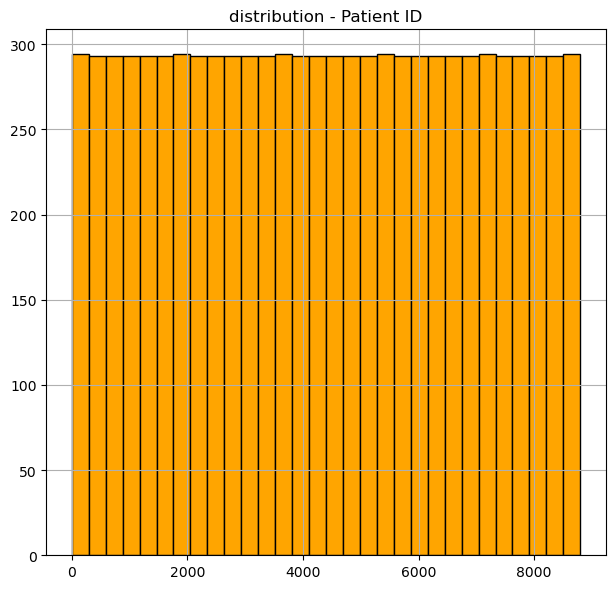

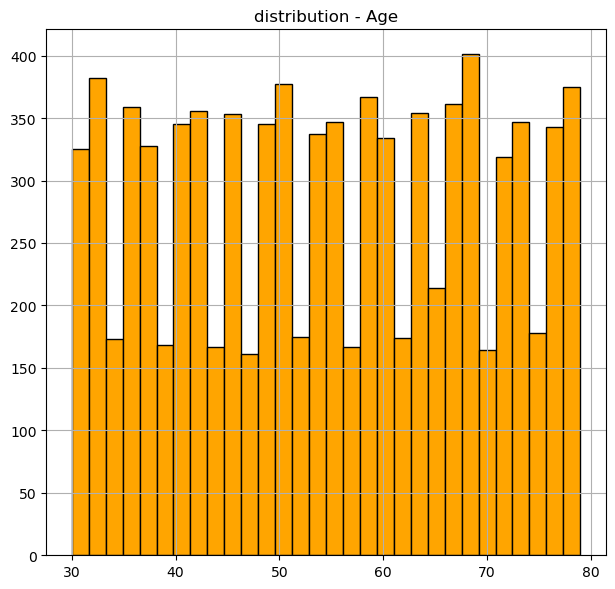

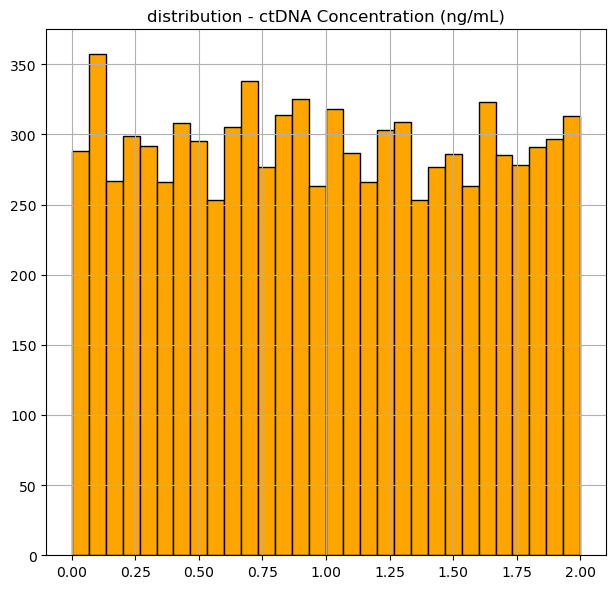

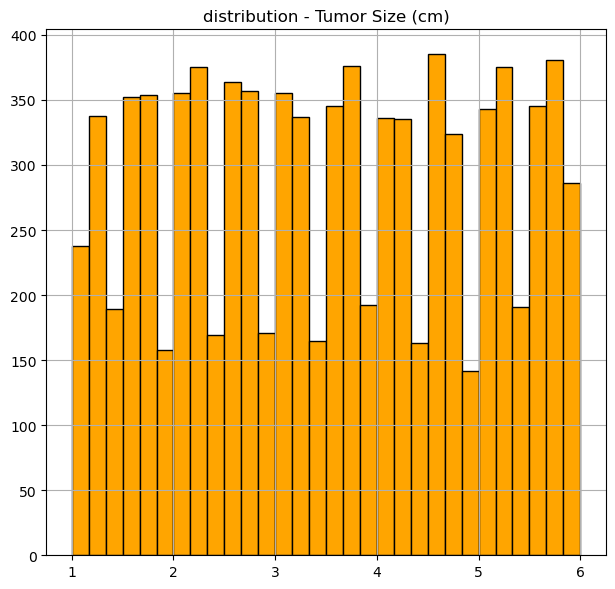

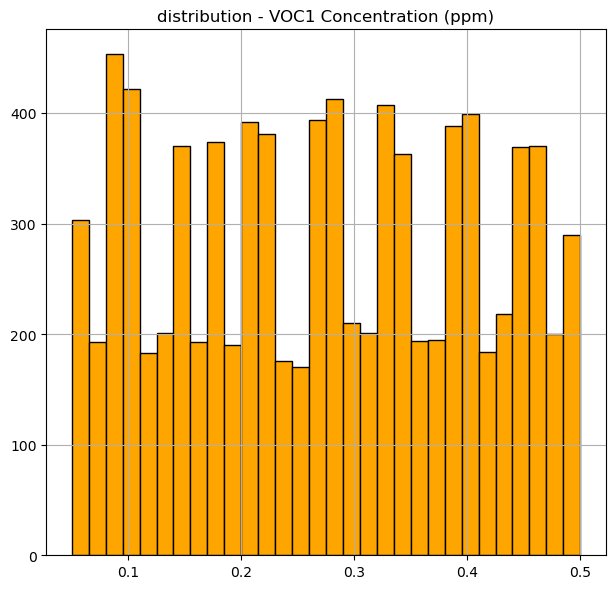

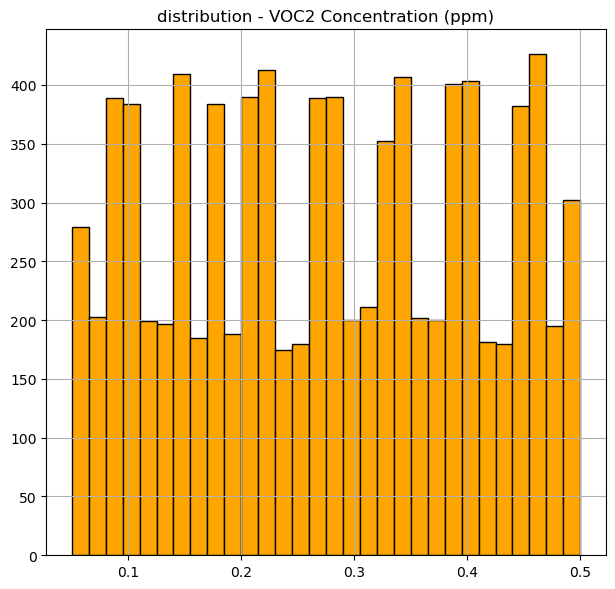

In [116]:
#histogram
for col in num_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30, color='orange', edgecolor='black')
    plt.title(f"distribution - {col}")
    plt.tight_layout()
    plt.show()
   
    

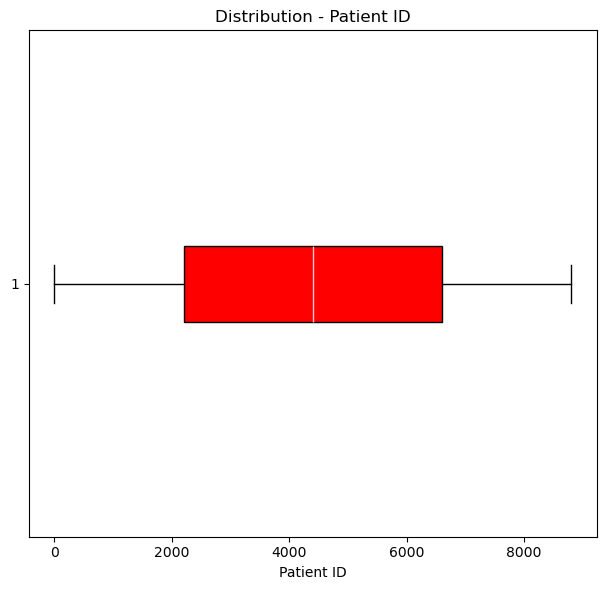

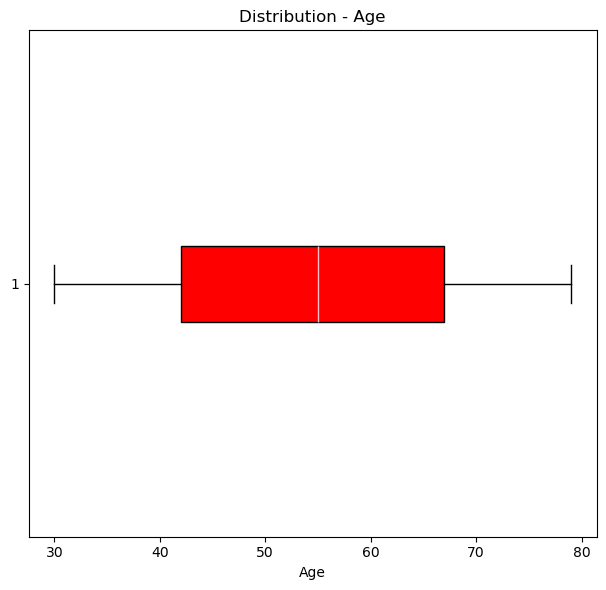

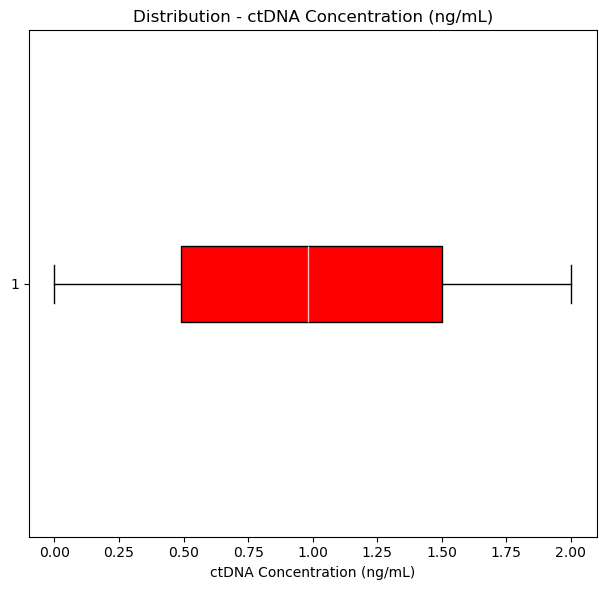

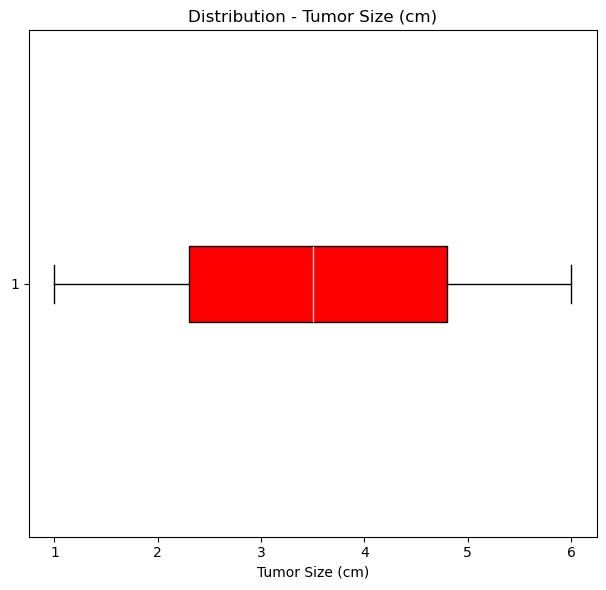

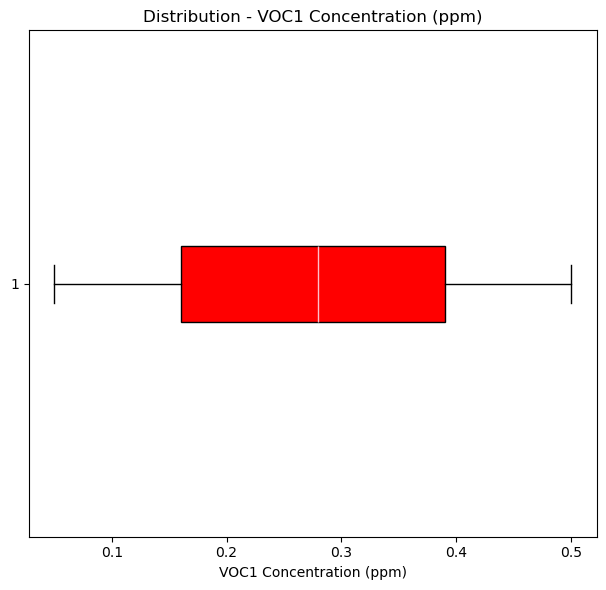

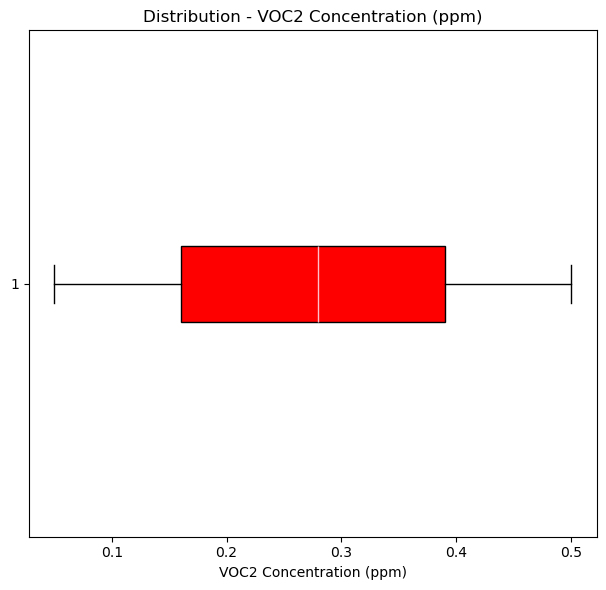

In [117]:
#boxplot
for col in num_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(df[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='red', color='black'),
                medianprops=dict(color='pink'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                flierprops=dict(markerfacecolor='black', marker='o', markersize=5))
    plt.title(f"Distribution - {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [118]:
# One-hot encode categorical variables
df2 = pd.get_dummies(df1, columns=['Gender', 'Smoking History', 'Family History', 'Treatment History', 'Mutation Type', 'Biopsy Result', 'Gene'], drop_first=True)
df2

,Patient ID,Age,ctDNA Concentration (ng/mL),Tumor Size (cm),VOC1 Concentration (ppm),VOC2 Concentration (ppm),Lung Cancer,Gender_Male,Smoking History_Yes,Family History_Yes,Treatment History_Radiotherapy,Treatment History_Surgery,Mutation Type_Insertion,Mutation Type_Point Mutation,Biopsy Result_Positive,Gene_EGFR,Gene_KRAS,Gene_TP53
0,1,53,0.02,2.5,0.17,0.22,Yes,True,True,False,True,False,False,False,True,False,True,False
1,2,66,1.61,1.1,0.18,0.39,Yes,False,False,False,True,False,True,False,True,False,True,False
2,3,40,1.36,4.7,0.26,0.31,Yes,False,False,False,True,False,False,False,False,True,False,False
3,4,43,1.93,1.7,0.26,0.29,Yes,True,True,False,False,False,True,False,True,False,True,False
4,5,44,0.63,5.4,0.22,0.36,Yes,False,False,True,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,8792,55,0.74,5.9,0.25,0.13,Yes,False,True,False,False,True,False,False,False,True,False,False
8792,8793,67,1.41,4.6,0.26,0.26,Yes,True,False,False,False,True,False,False,False,False,False,True
8793,8794,40,1.61,3.1,0.25,0.21,Yes,False,True,False,False,True,True,False,True,False,True,False
8794,8795,52,0.07,1.5,0.39,0.39,Yes,False,False,True,False,False,False,False,True,False,False,True


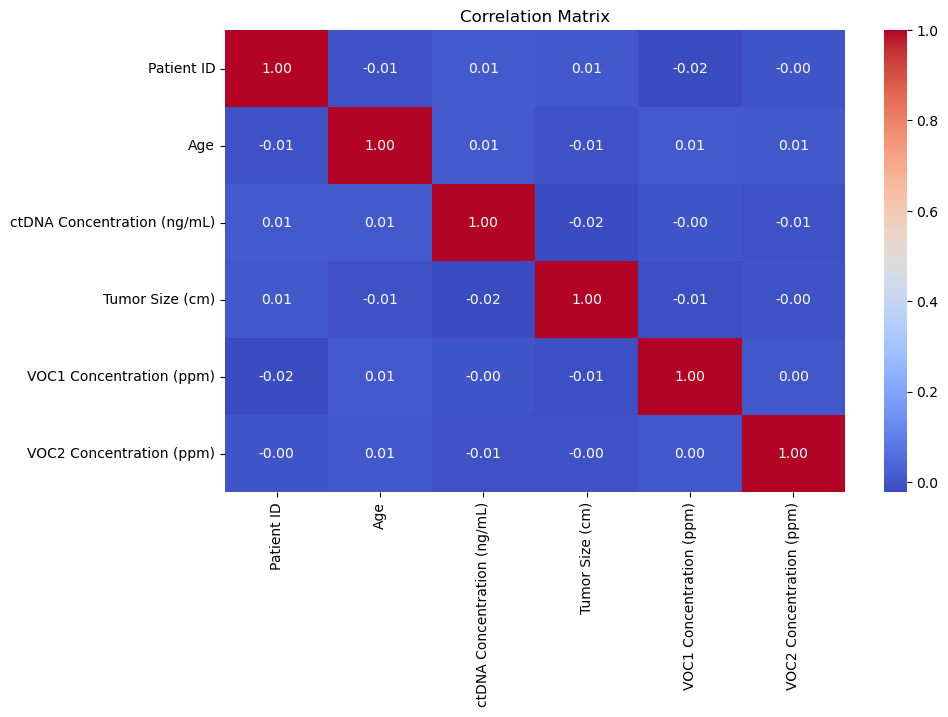

In [119]:
num_columns = df2.select_dtypes(include=['float64', 'int64']).columns
cr = df2[num_columns].corr()
num_columns
cr


plt.figure(figsize=(10, 6))
sns.heatmap(cr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Future selection

In [120]:
X=df2.drop(columns=["Lung Cancer"])
y=df2['Lung Cancer']


In [121]:
sk=SelectKBest(score_func=f_classif, k=10)
x_new=sk.fit_transform(X,y)

In [122]:
selected_features = X.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['Age', 'ctDNA Concentration (ng/mL)', 'Tumor Size (cm)',
       'VOC1 Concentration (ppm)', 'VOC2 Concentration (ppm)',
       'Smoking History_Yes', 'Family History_Yes',
       'Treatment History_Surgery', 'Biopsy Result_Positive', 'Gene_EGFR'],
      dtype='object')

Feature Scores:
                           Feature       Score
13          Biopsy Result_Positive  839.811854
7              Smoking History_Yes  616.491817
3                  Tumor Size (cm)  334.124340
4         VOC1 Concentration (ppm)  289.983161
2      ctDNA Concentration (ng/mL)  278.324844
5         VOC2 Concentration (ppm)  259.883823
1                              Age  185.732421
10       Treatment History_Surgery  115.848161
8               Family History_Yes   82.887543
14                       Gene_EGFR   16.936722
16                       Gene_TP53   15.581487
11         Mutation Type_Insertion    8.021503
15                       Gene_KRAS    4.523756
12    Mutation Type_Point Mut

In [123]:
#standerdization

In [124]:
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [125]:
#spliting train& test

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
X_train.shape

(6157, 17)

In [128]:
X_test.shape

(2639, 17)

In [129]:
y_train.shape

(6157,)

In [130]:
y_test.shape

(2639,)

## Model Building

In [131]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "MLP Classifier (Neural Network)": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)}

C:\Users\pro\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.9200454717696097
Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.64      0.71       402
         Yes       0.94      0.97      0.95      2237

    accuracy                           0.92      2639
   macro avg       0.87      0.81      0.83      2639
weighted avg       0.92      0.92      0.92      2639

Confusion Matrix:
 [[ 259  143]
 [  68 2169]]


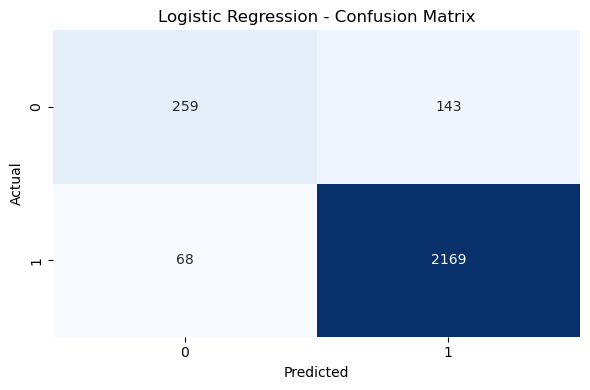


Support Vector Machine:
Accuracy: 0.8476695718075028
Classification Report:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00       402
         Yes       0.85      1.00      0.92      2237

    accuracy                           0.85      2639
   macro avg       0.42      0.50      0.46      2639
weighted avg       0.72      0.85      0.78      2639

Confusion Matrix:
 [[   0  402]
 [   0 2237]]


C:\Users\pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


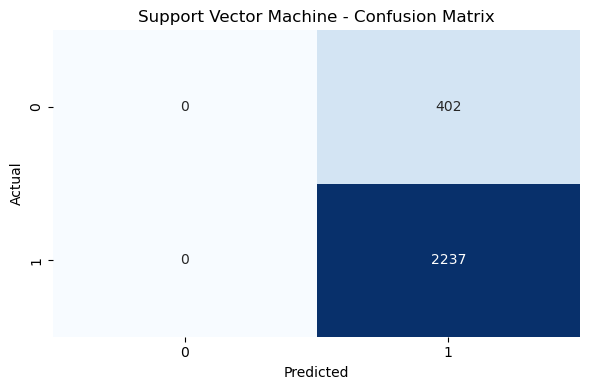


Decision Tree:
Accuracy: 0.9189086775293672
Classification Report:
               precision    recall  f1-score   support

          No       0.73      0.75      0.74       402
         Yes       0.95      0.95      0.95      2237

    accuracy                           0.92      2639
   macro avg       0.84      0.85      0.84      2639
weighted avg       0.92      0.92      0.92      2639

Confusion Matrix:
 [[ 300  102]
 [ 112 2125]]


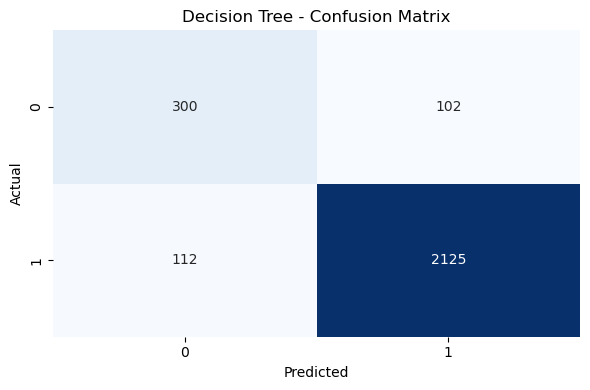


Random Forest:
Accuracy: 0.9283819628647215
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.61      0.72       402
         Yes       0.93      0.99      0.96      2237

    accuracy                           0.93      2639
   macro avg       0.91      0.80      0.84      2639
weighted avg       0.93      0.93      0.92      2639

Confusion Matrix:
 [[ 245  157]
 [  32 2205]]


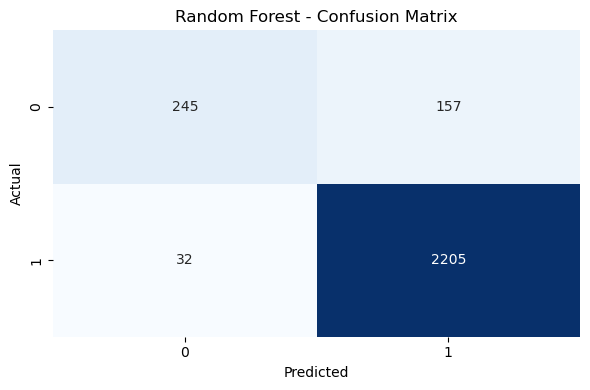


Gradient Boosting:
Accuracy: 0.9378552482000758
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.65      0.76       402
         Yes       0.94      0.99      0.96      2237

    accuracy                           0.94      2639
   macro avg       0.93      0.82      0.86      2639
weighted avg       0.94      0.94      0.93      2639

Confusion Matrix:
 [[ 263  139]
 [  25 2212]]


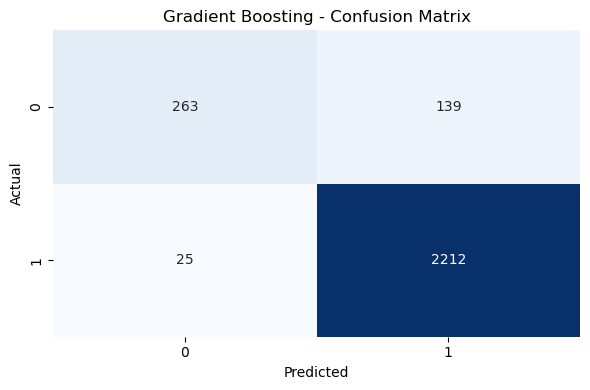

C:\Users\pro\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost:
Accuracy: 0.9556650246305419
Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.81      0.85       402
         Yes       0.97      0.98      0.97      2237

    accuracy                           0.96      2639
   macro avg       0.93      0.90      0.91      2639
weighted avg       0.95      0.96      0.95      2639

Confusion Matrix:
 [[ 325   77]
 [  40 2197]]


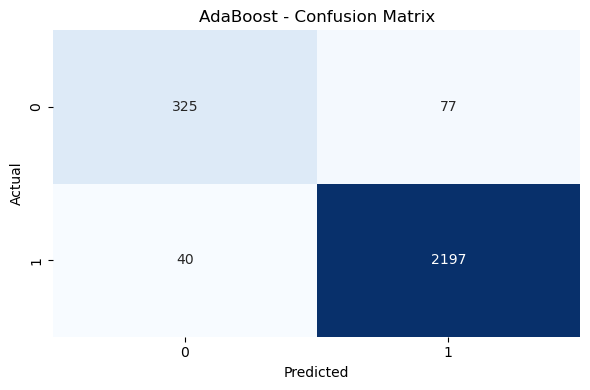


Naive Bayes:
Accuracy: 0.905267146646457
Classification Report:
               precision    recall  f1-score   support

          No       0.75      0.57      0.65       402
         Yes       0.93      0.97      0.95      2237

    accuracy                           0.91      2639
   macro avg       0.84      0.77      0.80      2639
weighted avg       0.90      0.91      0.90      2639

Confusion Matrix:
 [[ 229  173]
 [  77 2160]]


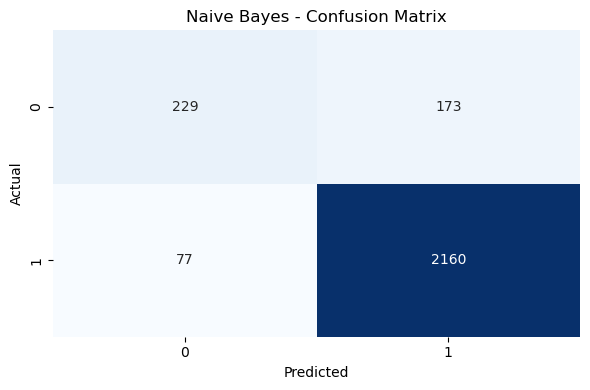


K-Nearest Neighbors:
Accuracy: 0.8298597953770368
Classification Report:
               precision    recall  f1-score   support

          No       0.19      0.04      0.06       402
         Yes       0.85      0.97      0.91      2237

    accuracy                           0.83      2639
   macro avg       0.52      0.50      0.48      2639
weighted avg       0.75      0.83      0.78      2639

Confusion Matrix:
 [[  15  387]
 [  62 2175]]


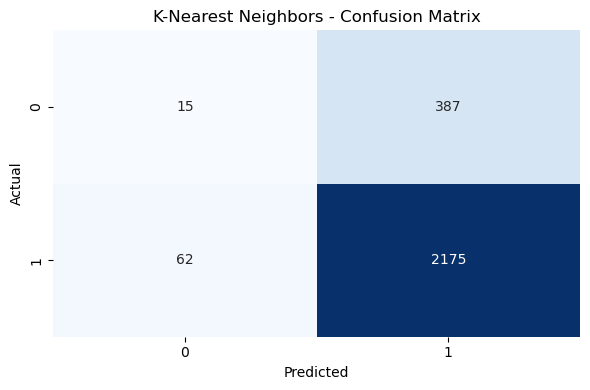


MLP Classifier (Neural Network):
Accuracy: 0.24289503599848428
Classification Report:
               precision    recall  f1-score   support

          No       0.16      0.96      0.28       402
         Yes       0.94      0.11      0.20      2237

    accuracy                           0.24      2639
   macro avg       0.55      0.54      0.24      2639
weighted avg       0.82      0.24      0.22      2639

Confusion Matrix:
 [[ 385   17]
 [1981  256]]


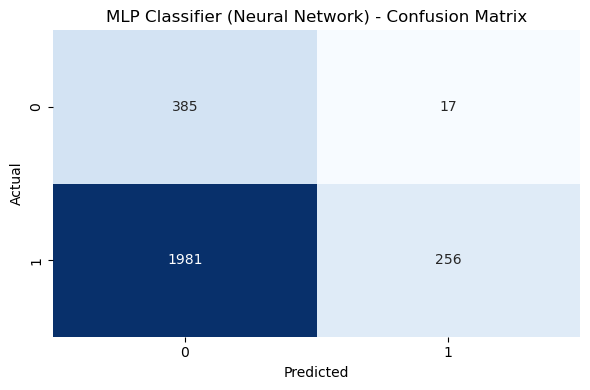

In [132]:
#  evaluation of  models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}:")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [133]:
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)

print(f"\nBest Performing Model: {best_model} with {results[best_model]:.2f} accuracy")
print(f"Worst Performing Model: {worst_model} with {results[worst_model]:.2f} accuracy")


Best Performing Model: AdaBoost with 0.96 accuracy
Worst Performing Model: MLP Classifier (Neural Network) with 0.24 accuracy


## Hyperparameter Tuning:

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [135]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [136]:
print("Best Parameters:", grid_search.best_params_)
print("Best accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy Score: 0.9299980482555625


In [137]:
joblib.dump(best_model,"adb_model.joblib")

['adb_model.joblib']

In [138]:
['adb_model.joblib']

['adb_model.joblib']

In [139]:
loded_model=joblib.load("adb_model.joblib")

# Conclusion
In this project, we developed a lung cancer prediction model using various machine learning algorithms on a real-world dataset. After preprocessing the data—handling missing values, treating outliers, and balancing classes with SMOTE—we evaluated several classification models including Logistic Regression, SVM, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, Naive Bayes, K-Nearest Neighbors, and MLP Classifier.

All models were evaluated using accuracy, classification reports, and confusion matrices. Among these, the best-performing model (based on accuracy) was:

✅ [Ada Boost Classifeir] – This will be filled in once the final accuracy output is confirmed.

This model demonstrated the highest ability to generalize to unseen test data, making it the most suitable for lung cancer prediction tasks in this context.

The results highlight the importance of data preprocessing and model comparison in building robust predictive systems. Future improvements could include hyperparameter tuning, deeper feature engineering, and cross-validation for enhanced performance.

